# Дашборд для изучения активности пользователей Яндекс.Дзен

# Описание проекта

Менеджерам по анализу контента необходимо еженедельно получать ответы на следующие вопросы:

•	Сколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?  
•	Как много карточек генерируют источники с разными темами?  
•	Как соотносятся темы карточек и темы источников?  

Для получения данной информации необходимо автоматизировать анализ пользовательского взаимодействия с карточками статей Яндекс.Дзен.  


# Цель проекта

Разработать и разместить дашборд на платформе public.tableau.com и подготовить презентацию с ответами на поставленные вопросы.

# Описание данных  

*Датасет dash_visits.csv*  

**record_id** - идентификатор записи  
**item_topic** - тема карточки, рпимеры тем: «Красота и здоровье», «Россия», «Путешествия»    
**source_topic** - источник карточки (у него тоже есть тема)  
**age_segment** - возрастная категория, к примеру «26-30» или «45+»  
**dt** - дата и время  
**visits** - количество взаимодействий  

# Содержание  

1 Техническое задание  
2 Импорт библиотек, загрузка и экспорт данных  
3 Ссылки на дашборд и презентацию  

##  1 Техническое задание

**Бизнес-задача:**  
Анализ взаимодействия пользователей с карточками Яндекс.Дзен.

**Насколько часто предполагается пользоваться дашбордом:**  
Не реже, чем раз в неделю.  

**Кто будет основным пользователем дашборда:**  
Менеджеры по анализу контента.  

**Состав данных для дашборда:**  
История событий по темам карточек (два графика - абсолютные числа и процентное соотношение).  
Разбивка событий по темам источников.  
Таблица соответствия тем источников темам карточек.

**По каким параметрам данные должны группироваться:**  
Дата и время.
Темы карточек.
Темы источников.
Возрастные категории.

**Характер данных:**  
История событий по темам карточек — абсолютные величины с разбивкой по минутам.  
Разбивка событий по темам источников — относительные величины (% событий).  
Соответствия тем источников темам карточек - абсолютные величины.

**Важность:**  
Все графики имеют равную важность.

**Источники данных для дашборда:**  
Сырые данные о событиях взаимодействия пользователей с карточками (таблица dash_visits).  

**База данных, в которой будут храниться агрегированные данные:**  
Дополнительные агрегированные таблицы в БД zen.

**Частота обновления данных:**  
Один раз в сутки, в полночь по UTC.

**Какие графики должны отображаться и в каком порядке, какие элементы управления должны быть на дашборде (макет дашборда):**
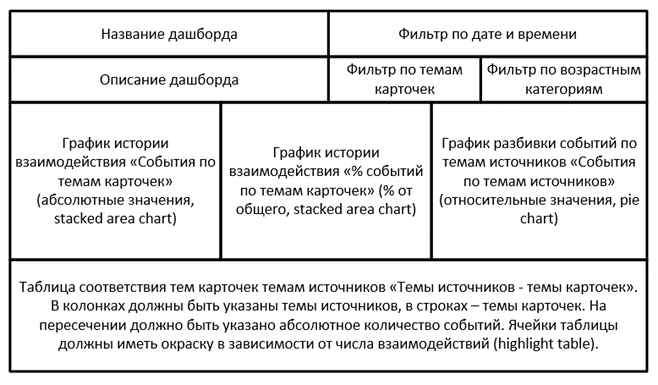

## 2 Импорт библиотек, загрузка и экспорт данных

Импортируем библиотеки:

In [1]:
import pandas as pd
from sqlalchemy import create_engine

Формируем запрос к базе данных и загружаем датасет:

In [2]:
db_config = {'user': '*******',  # имя пользователя
            'pwd': '*******',  # пароль
            'host': '*******',  # хост
            'port': 6432,  # порт подключения
            'db': '*******'} #  название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string)

query = ''' SELECT *
            FROM dash_visits
        '''

df = pd.io.sql.read_sql(query, con = engine) 

Посмотрим первые 5 строк и общую информацию:

In [3]:
display(df.head())
df.info()

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


Пропусков нет, все данные представлены соответствующим типом, можно выгружать данные в файл **dash_visits.csv** для последющей загрузки в **Tableau** и создания дашборда:

In [4]:
df.to_csv('dash_visits.csv', index=False)

## 3 Ссылки на дашборд и презентацию

Дашборд: <https://public.tableau.com/app/profile/alex.frolov/viz/dashboard_yandex_dzen_frolov/sheet4_1>

Презентация: <https://disk.yandex.ru/i/HBWJ97xv7wlGNQ>